In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886040401PNS003SRSPEC0039.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.647e-03 +/- 6.540e-04 (63.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.732e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040401PNS003BGSPEC0039.FTZ
  Background Exposure Time: 1.732e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040401PNS003SRCARF0039.FTZ



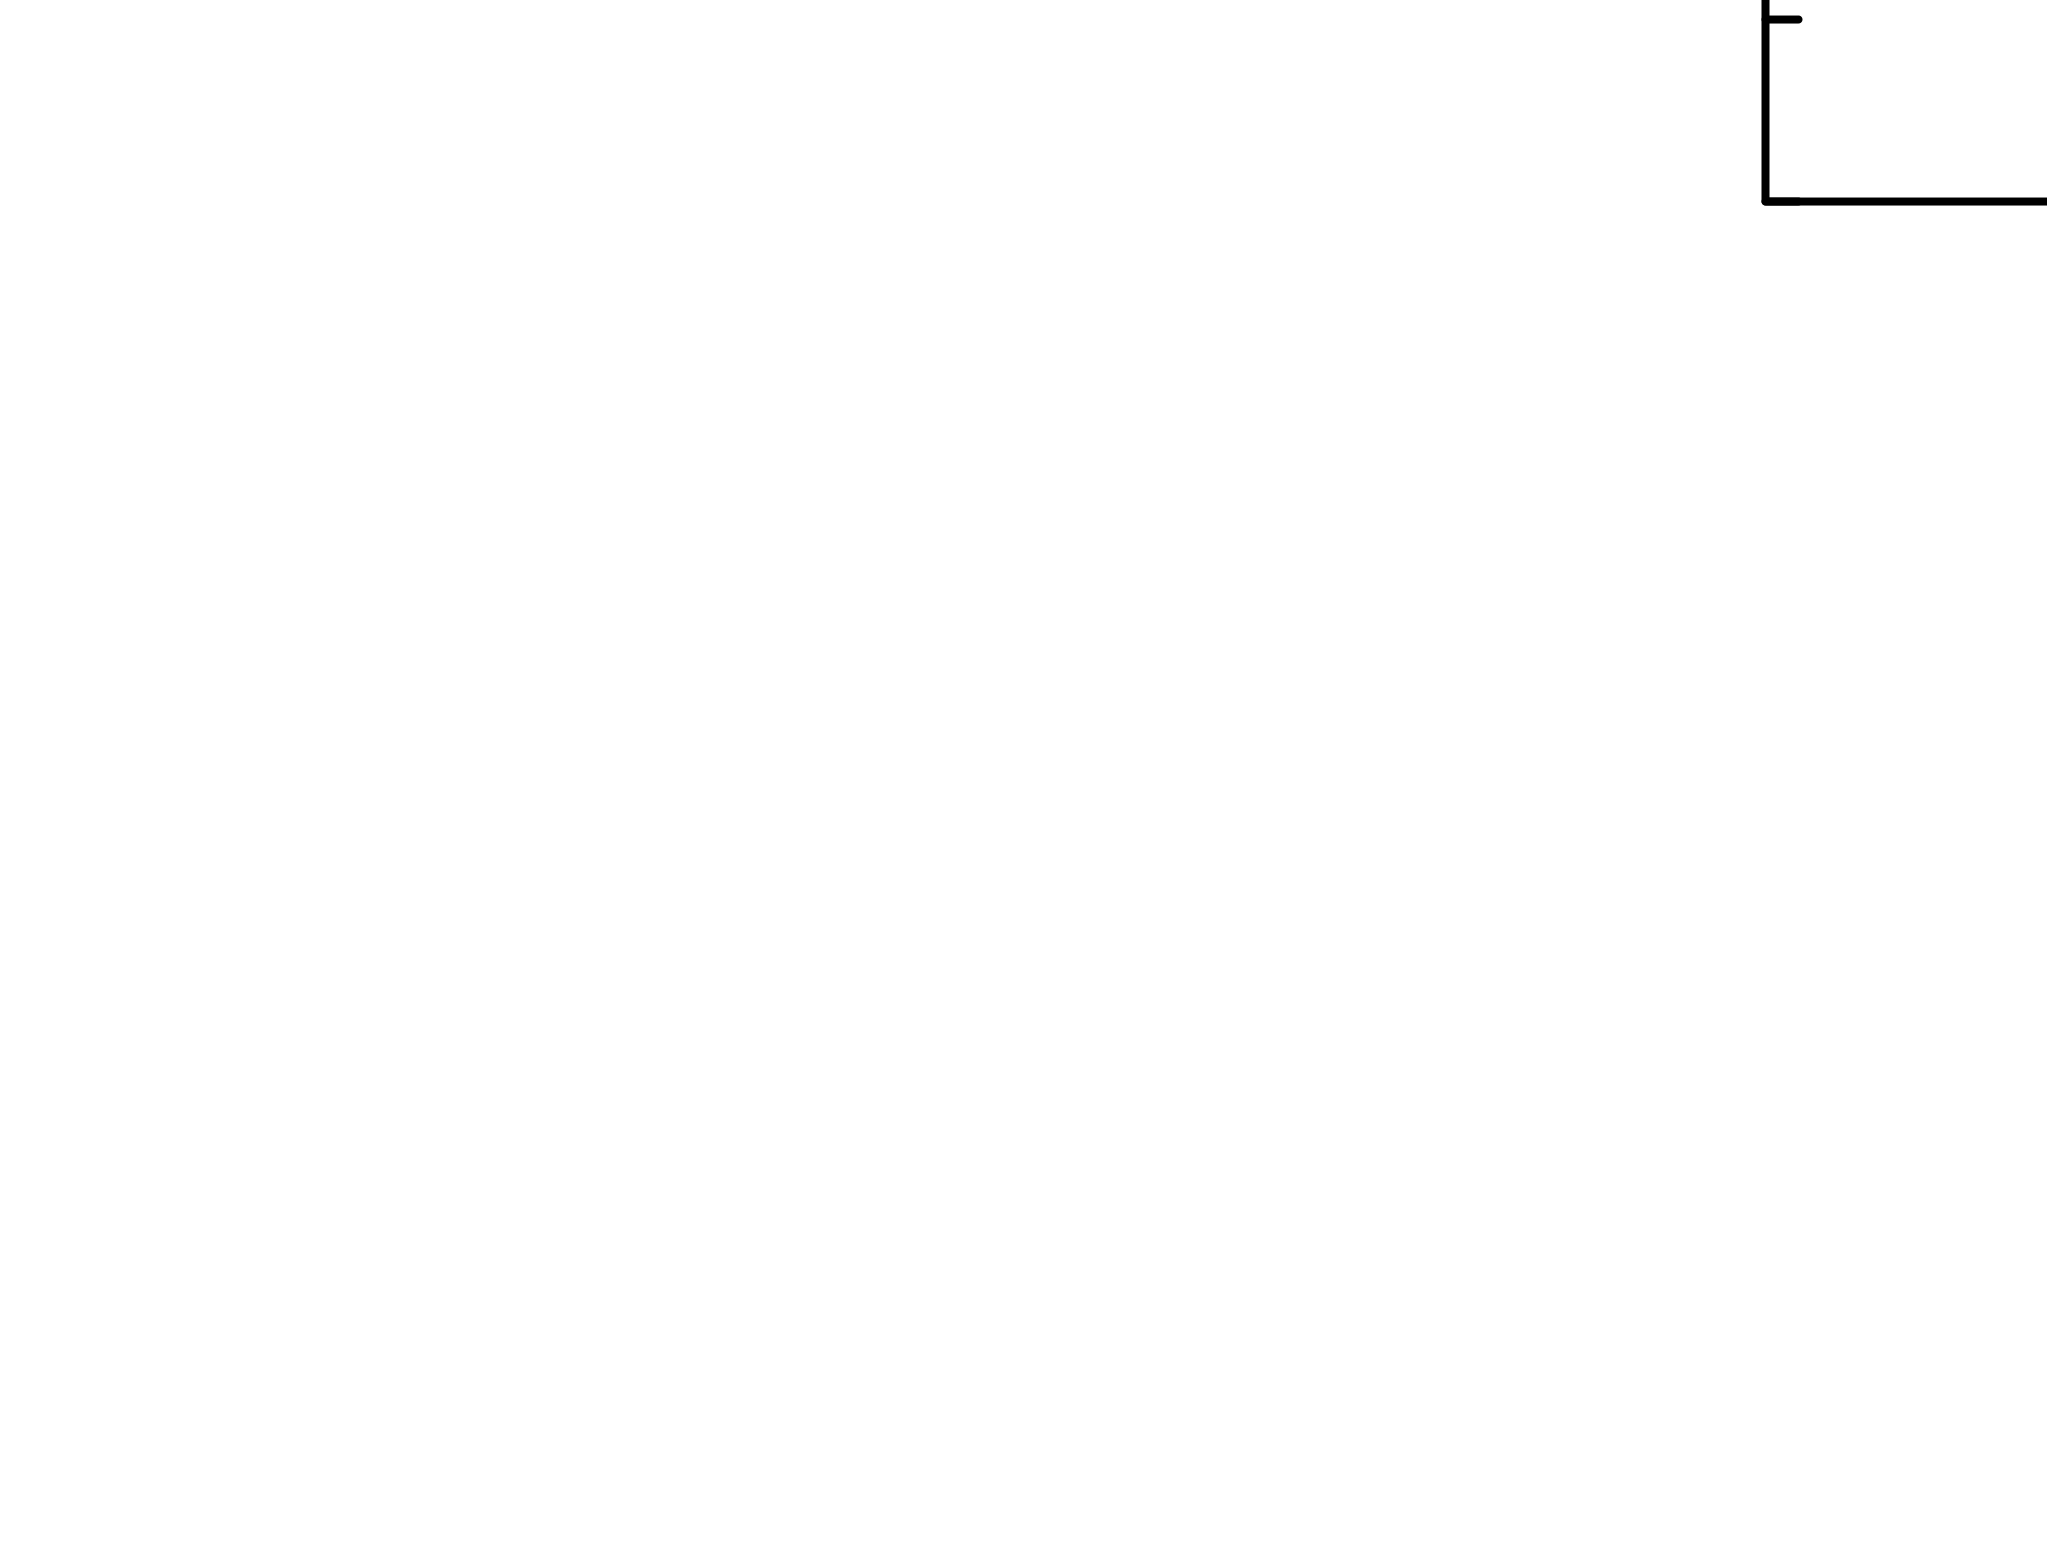

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (6) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

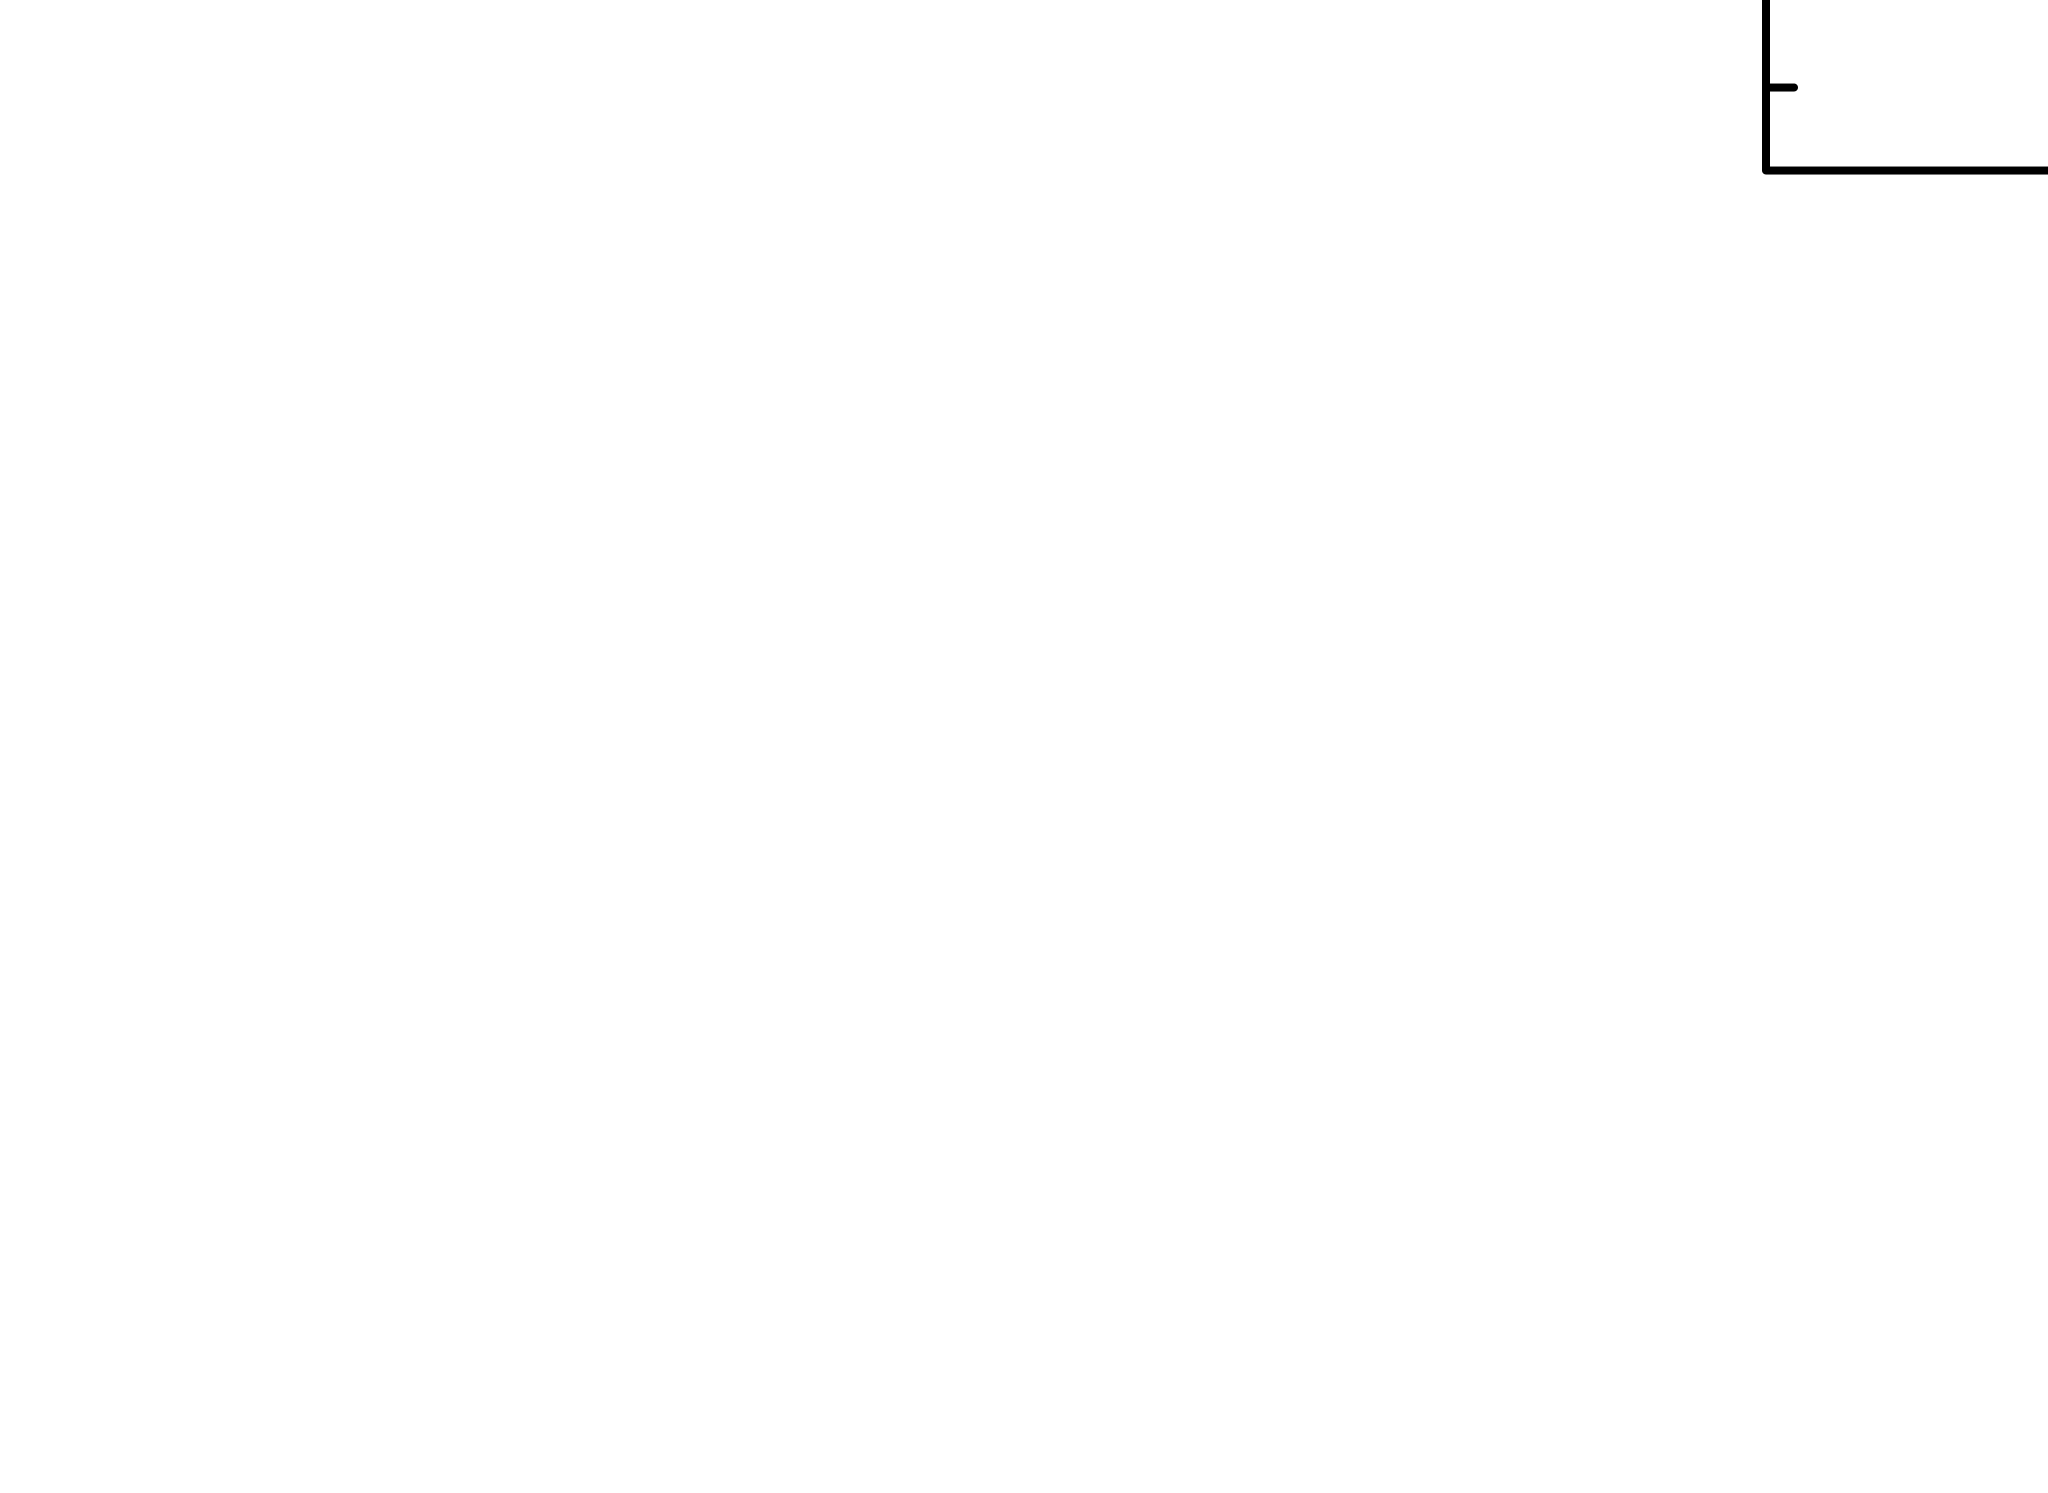

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.170542e+10     using 5 bins.

Test statistic : Chi-Squared              7.170542e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
4.91593      1.63272      -3       2.13807       2.90536   5.03147e-05
4.19306      38149.4      -4       2.08265       2.08787   6.92995e-05
3.45279      23290.3      -5       2.18381       2.21456   7.66956e-05
3.4

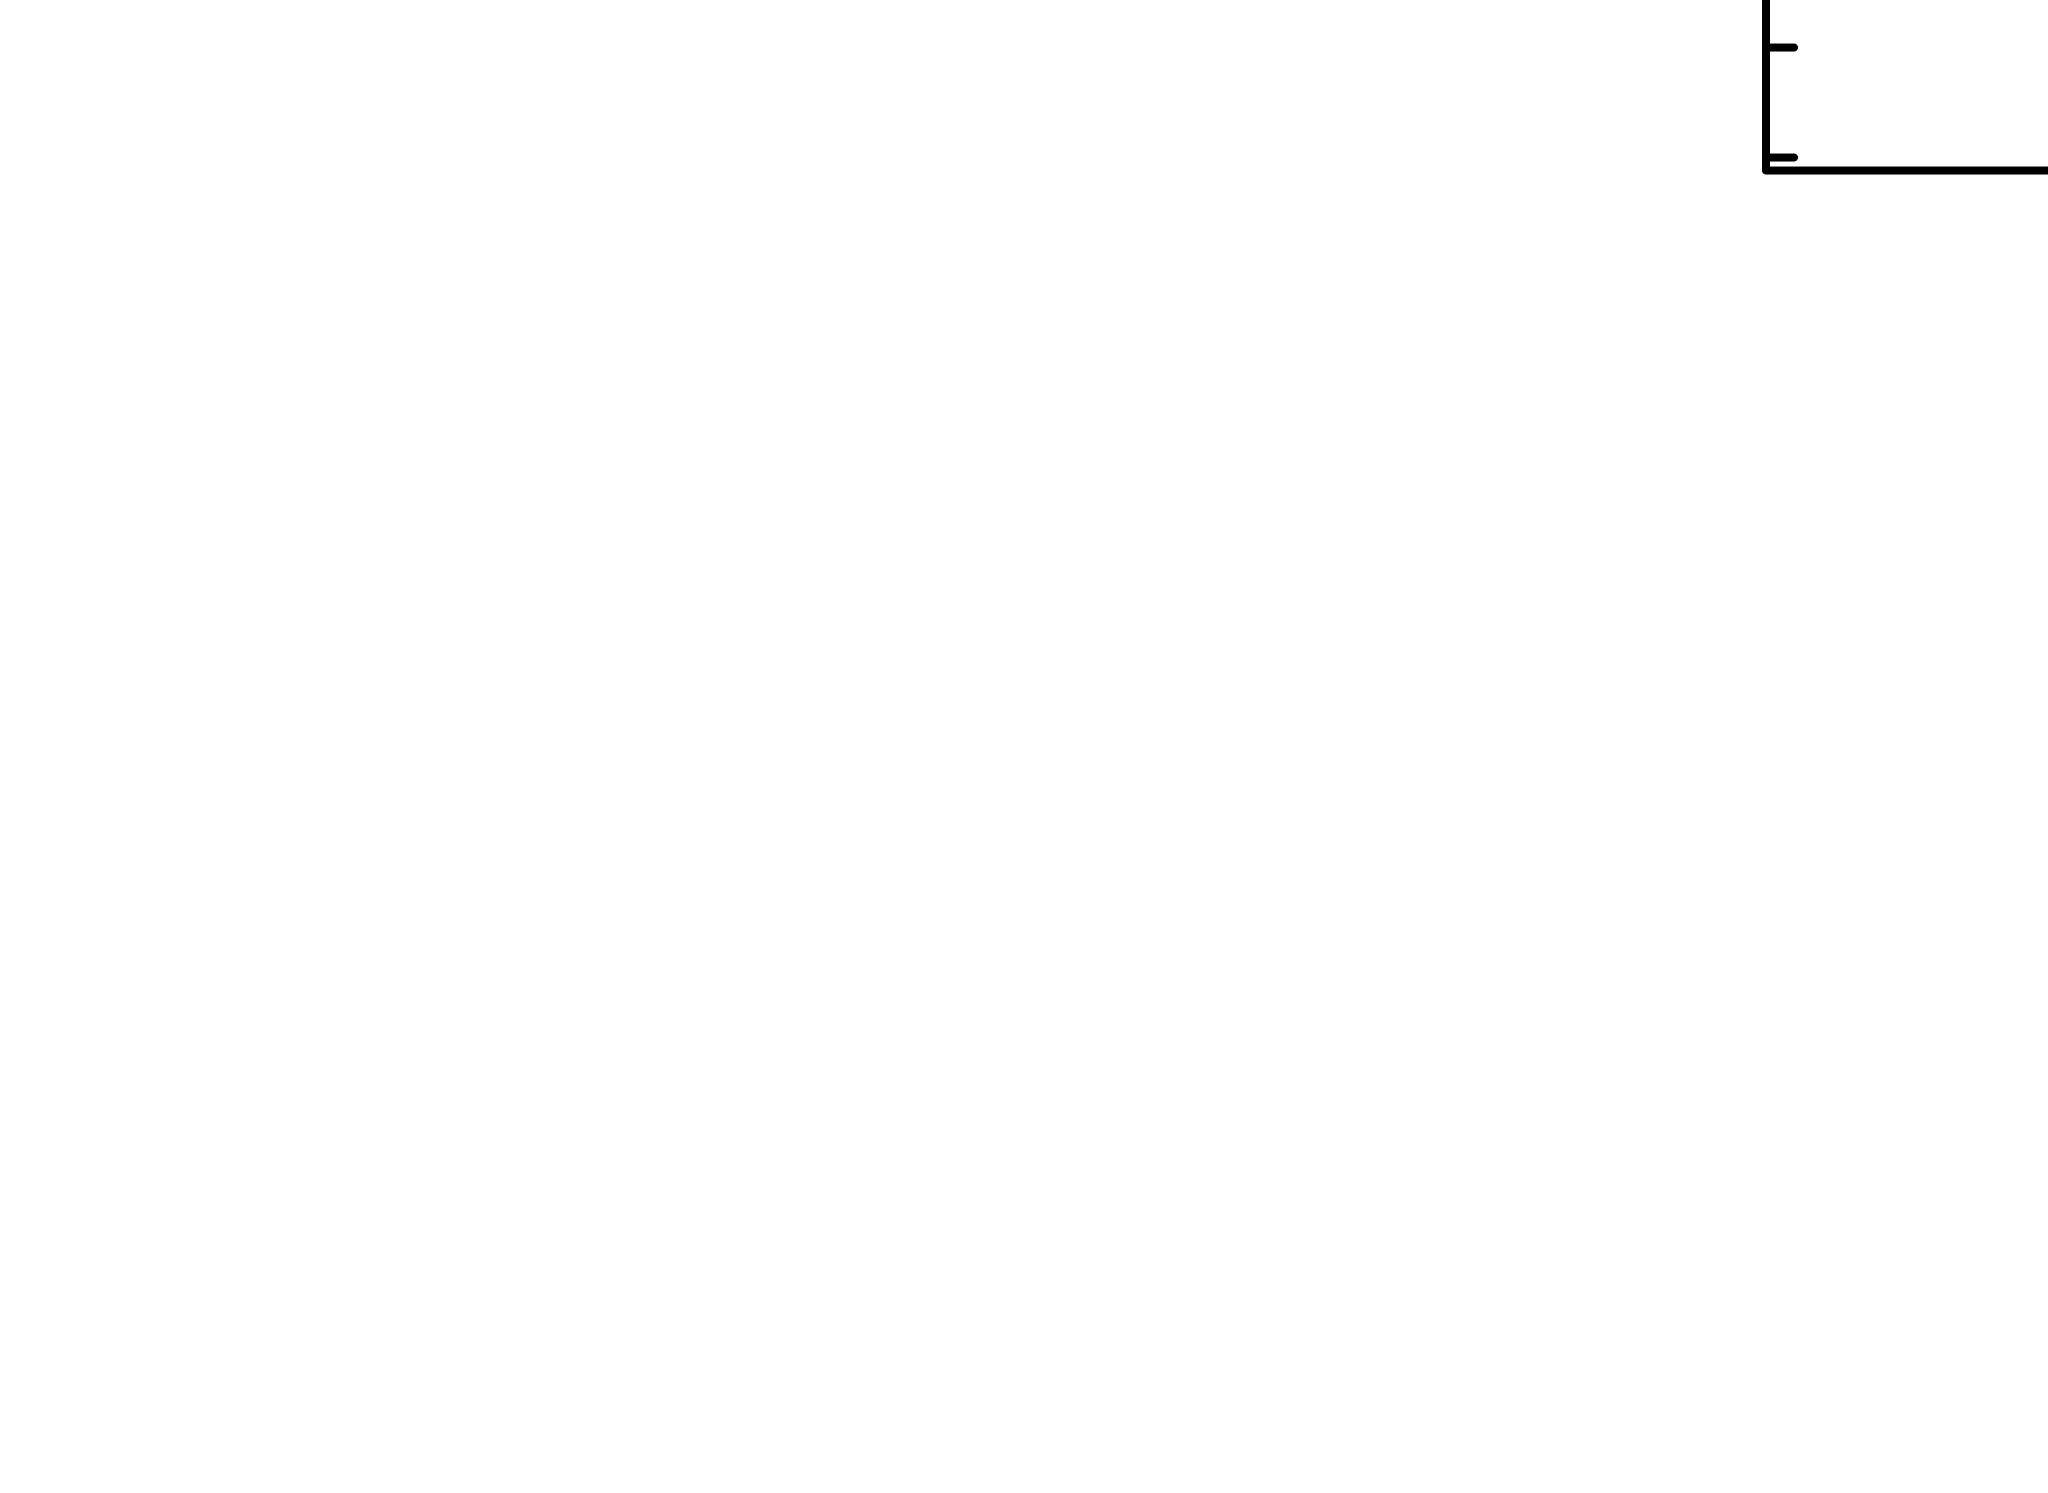

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.831440e+10     using 5 bins.

Test statistic : Chi-Squared              2.831440e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
11.4512      3.05855      -3       2.33056       4.79579   7.4

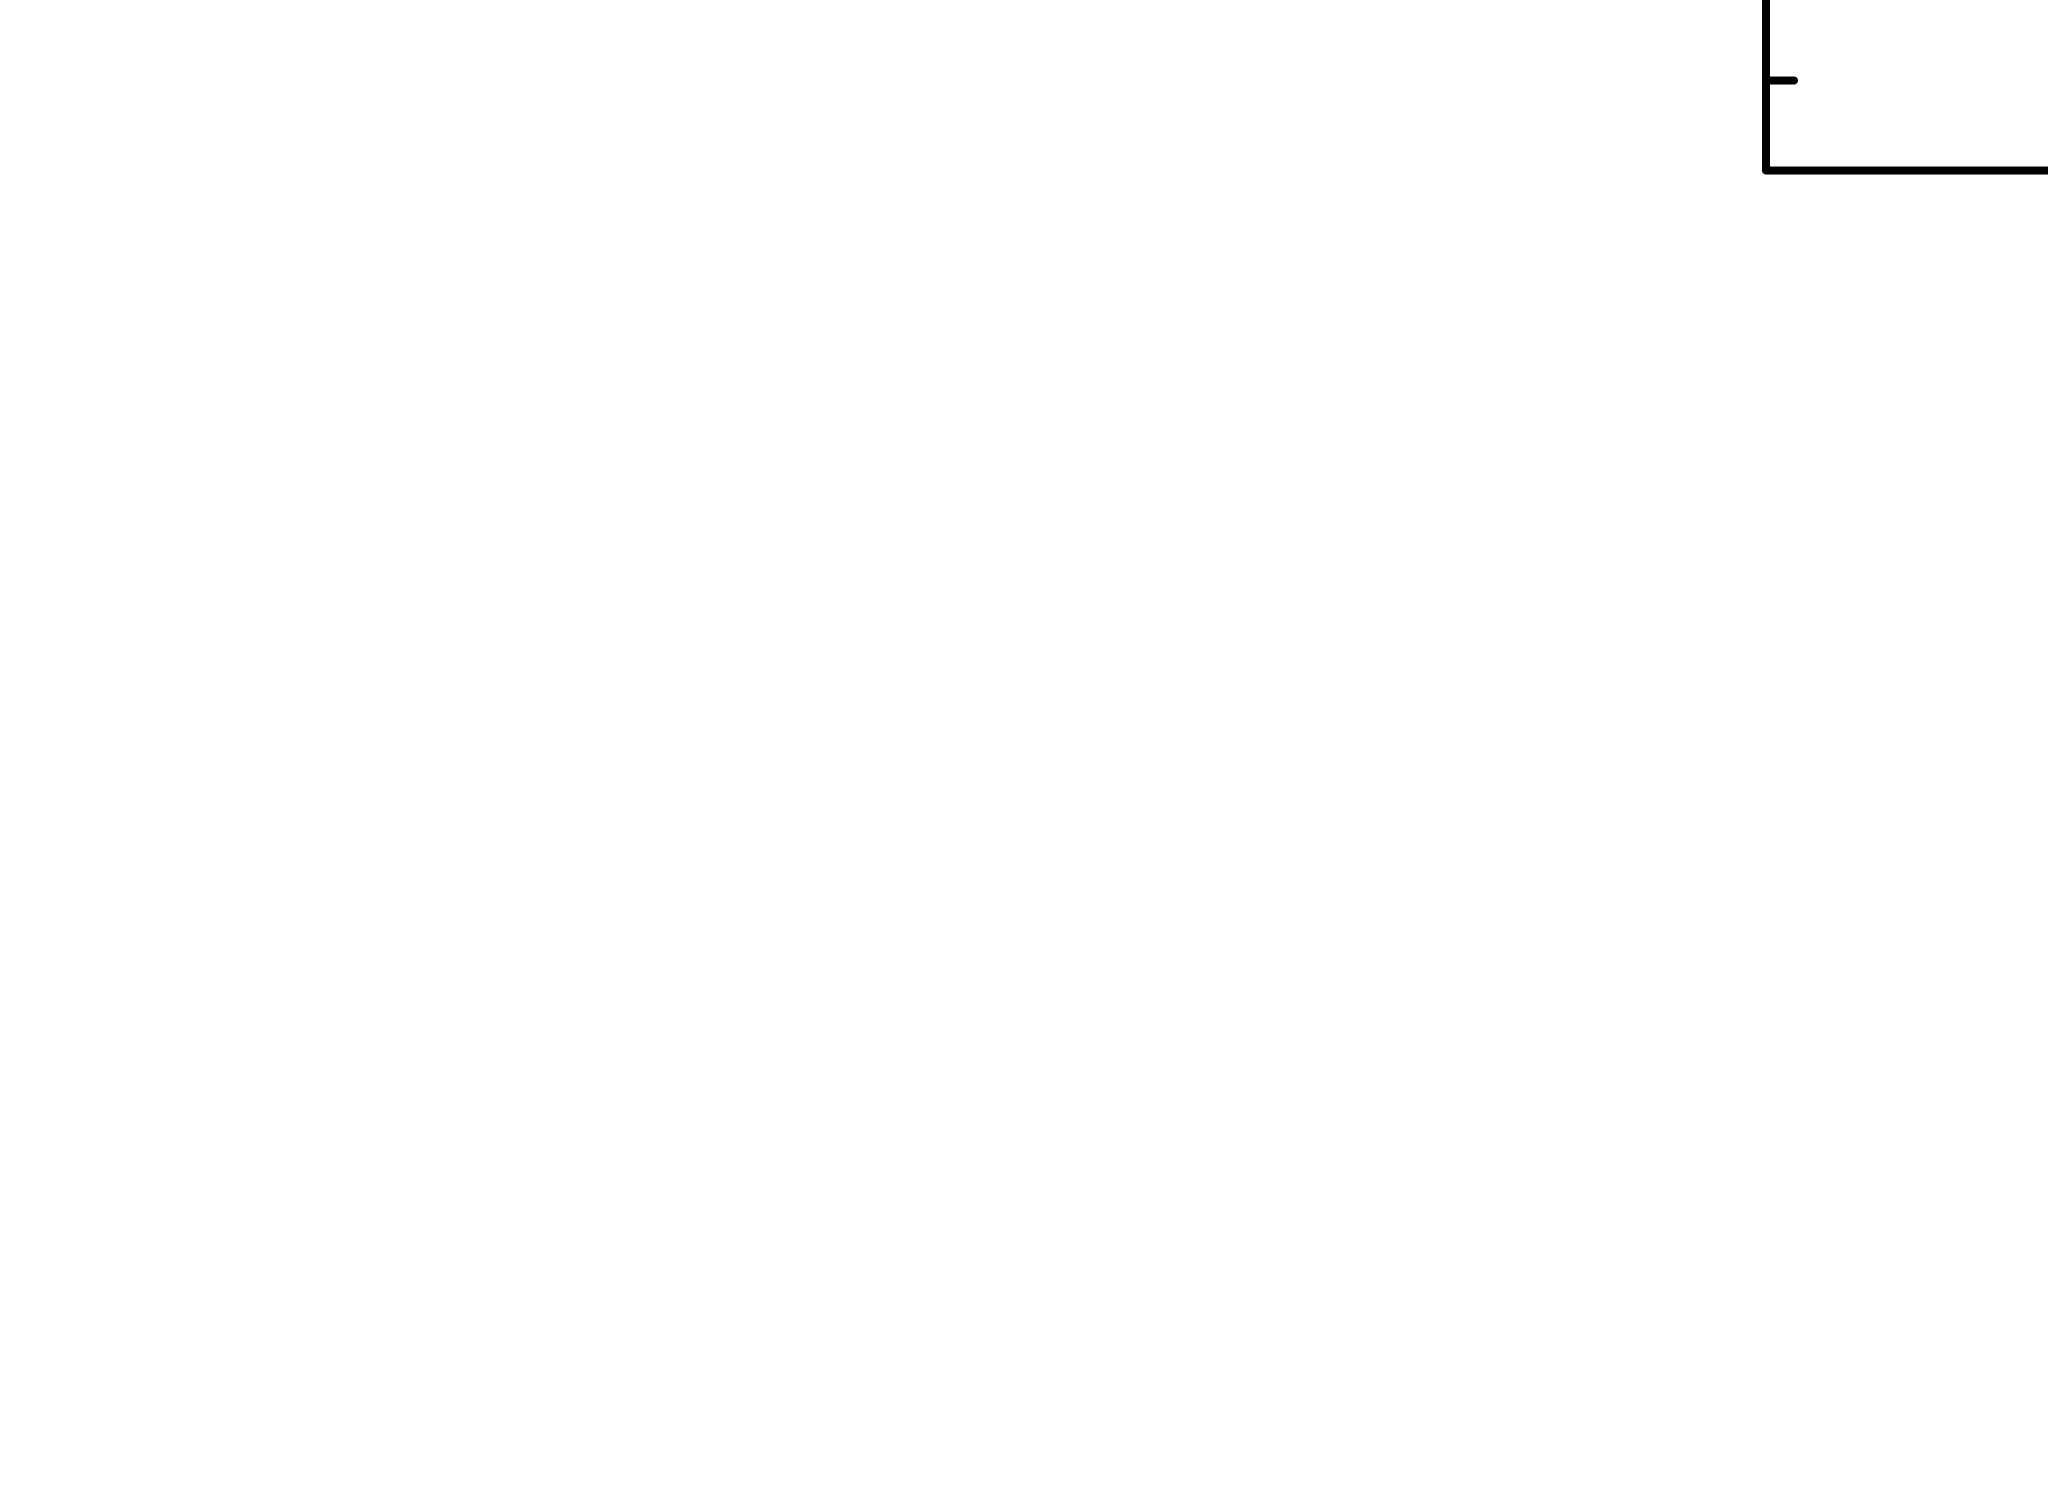

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.586108e+11     using 5 bins.

Test statistic : Chi-Squared              4.586108e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
9.49264      2.08192      -1      0.844675       1.26572   1.16011e-05
8.19236      49675.2      -1       1.10533       1.45446   1.53506e-05
7.11666      69665.8   

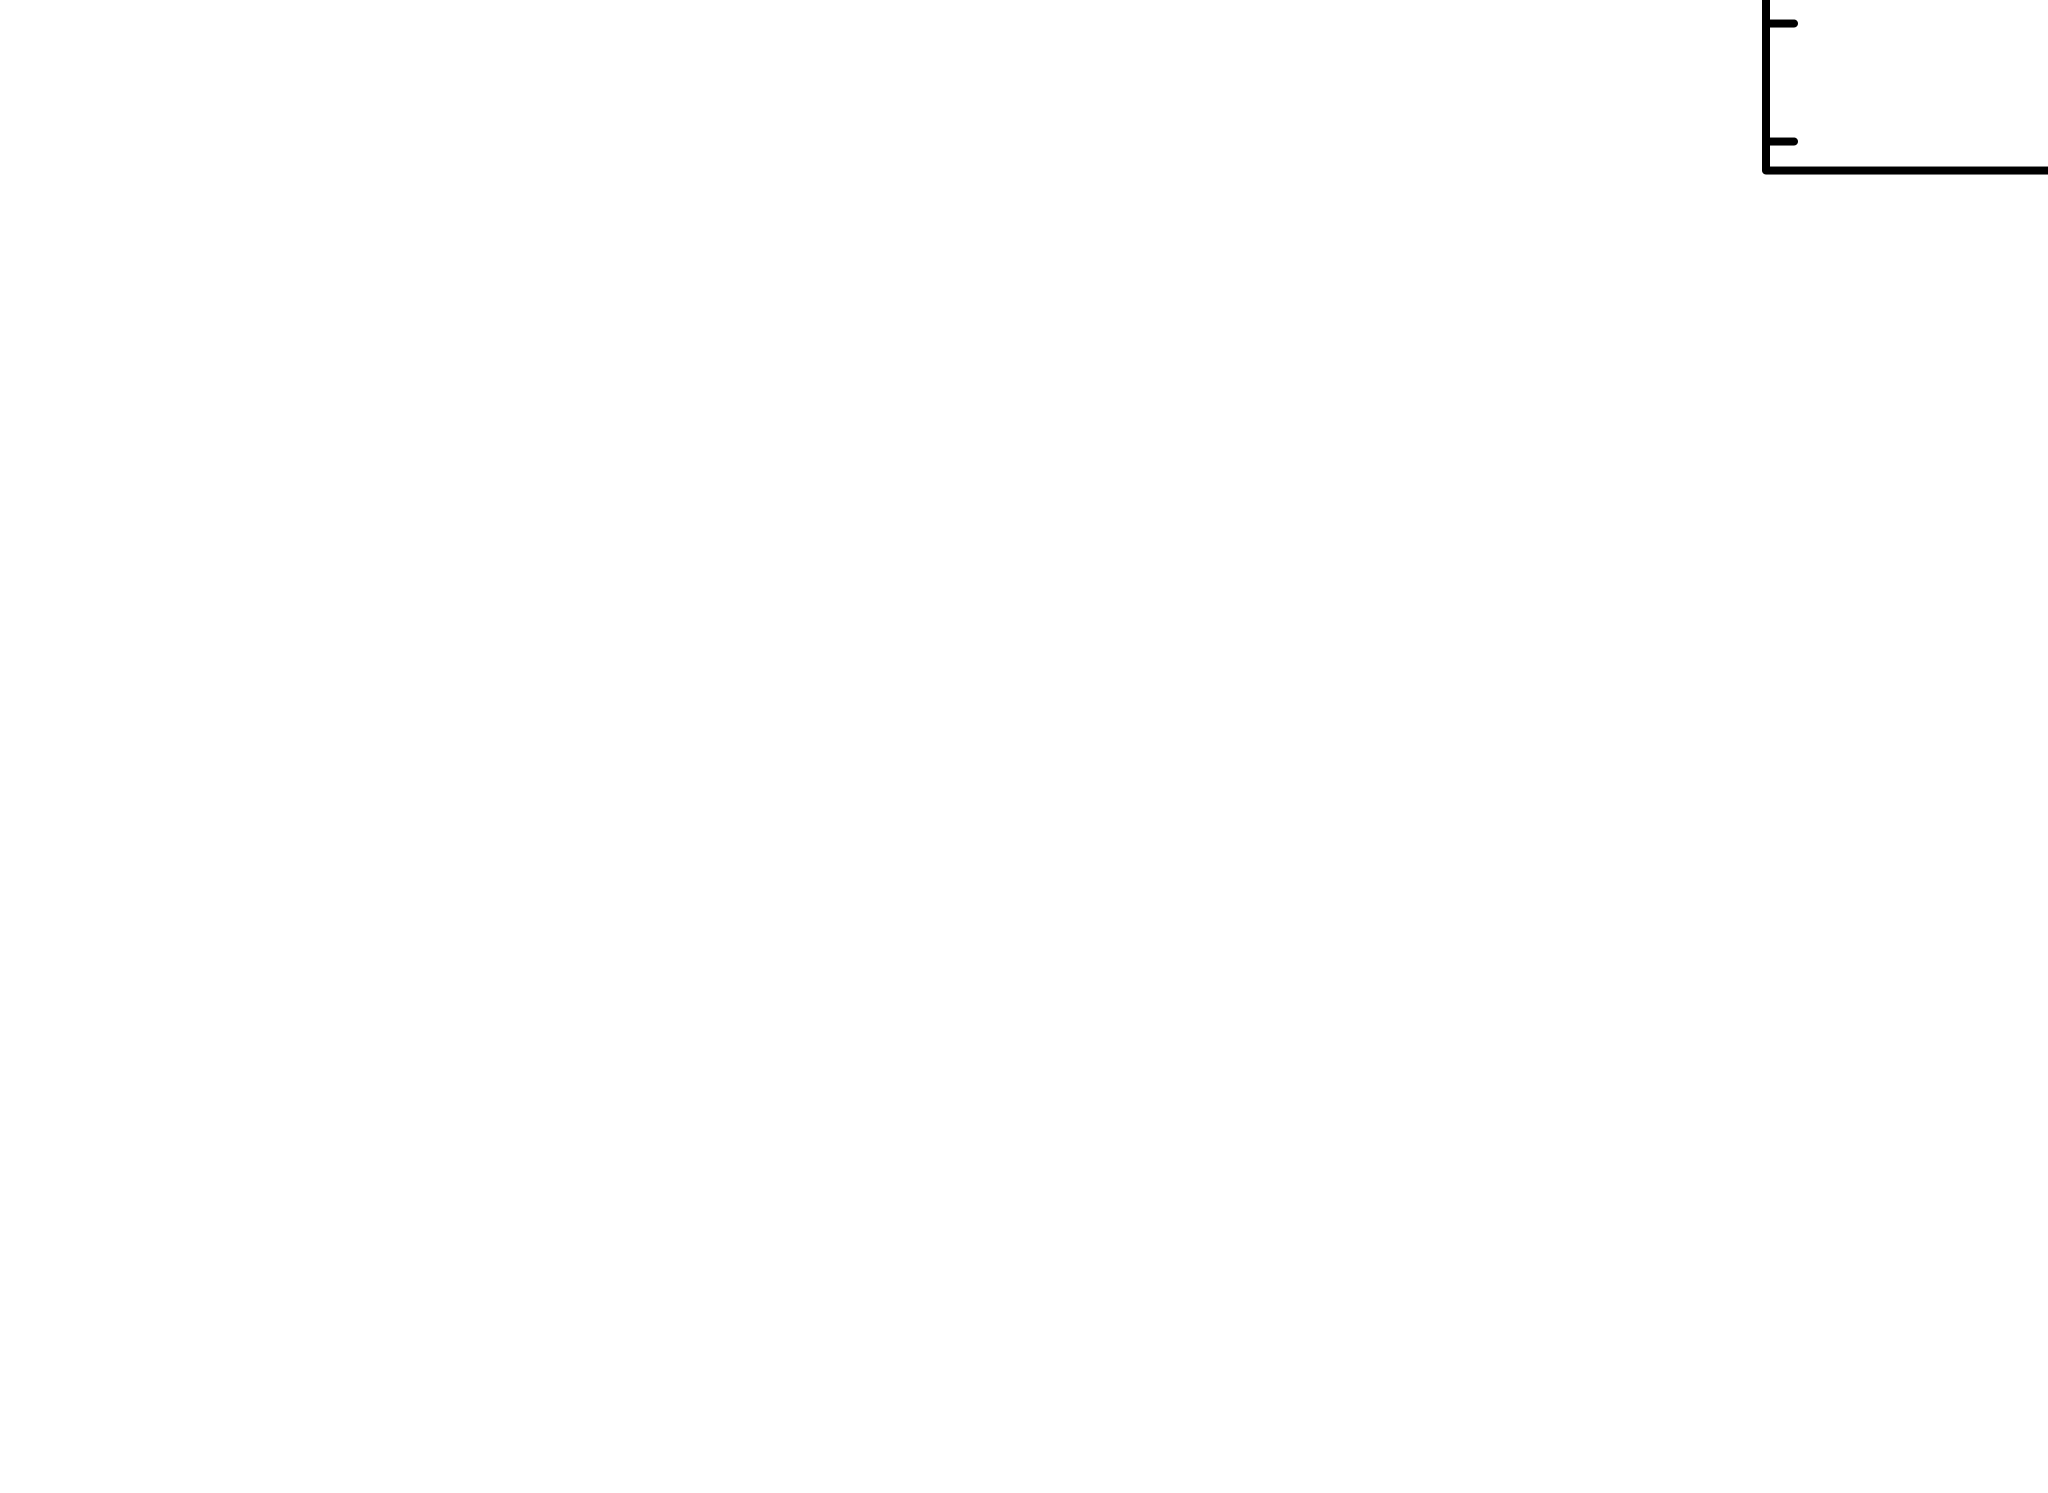

   -1       1.26008       1.63176   2.00039e-05
6.2627       48782        -1       1.40314       1.78541   2.52677e-05
5.60602      32471.7      -1       1.53219       1.92087   3.09575e-05
5.10132      21937.3      -1       1.64897       2.04078   3.69504e-05
4.71104      15238.9      -1       1.75447       2.14724   4.31416e-05
4.40724      10876.5      -1       1.84973       2.24199   4.94372e-05
4.16927      7956.38      -1       1.93575       2.32648   5.57548e-05
4.14016      5950.08      -2       2.40178       2.74882   8.89047e-05
4.118        19477.5      -3       2.84348       3.15073   0.000149246
3.21403      12622.9      -4       2.75150       3.09788   0.000161076
3.20941      872.689      -5       2.79239       3.12291   0.000165715
3.20934      32.7712      -6       2.78114       3.11580   0.000164031
 Variances and Principal Axes
                 1        2        3  
 5.7845E-10| -0.0001  -0.0002   1.0000  
 1.1792E-01|  0.6094  -0.7929  -0.0001  
 2.2331E+00|  0.7929

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.3969e-05 photons (7.3988e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
#plx = 1.4843
d_kpc = 8
F_x = 7.3988*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

5.663993479676723e+32
